# 1.understanding the data

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
car_price=pd.read_csv('F:\pyWork\pyProjects\py_jupyter\Finalprojects_DS-master\Car_pricing_prediction//CarPrice_Assignment.csv')

In [3]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 2. data cleaning and preparation

In [6]:
car_price=car_price.join(car_price['CarName'].str.split(' ',1,expand=True).rename(columns={0:'company',1:'carmodel'}))
#spliting the car name to comapny and car model and adding new columns to it .

In [7]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,carmodel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.00,102,5500,24,30,13950.000,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.00,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.50,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.30,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.00,160,5500,16,22,17859.167,audi,5000s (diesel)


In [8]:
#replacing incorrect values to correct values
car_price['company'].replace('maxda','mazda',inplace=True)
car_price['company'].replace('porcshce','porsche',inplace=True)
car_price['company'].replace('toyouta','toyota',inplace=True)
car_price['company'].replace('vokswagen','volkswagen',inplace=True)
car_price['company'].replace('vw','volkswagen',inplace=True)

In [9]:
#converting all the string data to lower case,to avoid any case difference error
car_price['company']=car_price['company'].str.lower()

In [10]:
#checking for duplicate values
car_price.loc[car_price.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,carmodel


# 3. visualizing the data

In [11]:
"""

    Categorical Data 

    - Company               #
    - Symboling             #
    - fueltype              #
    - enginetype            #
    - carbody               #
    - doornumber            #
    - enginelocation        #
    - fuelsystem            #
    - cylindernumber        #
    - aspiration            #
    - drivewheel            #


"""

'\n\n    Categorical Data \n\n    - Company               #\n    - Symboling             #\n    - fueltype              #\n    - enginetype            #\n    - carbody               #\n    - doornumber            #\n    - enginelocation        #\n    - fuelsystem            #\n    - cylindernumber        #\n    - aspiration            #\n    - drivewheel            #\n\n\n'

<BarContainer object of 22 artists>

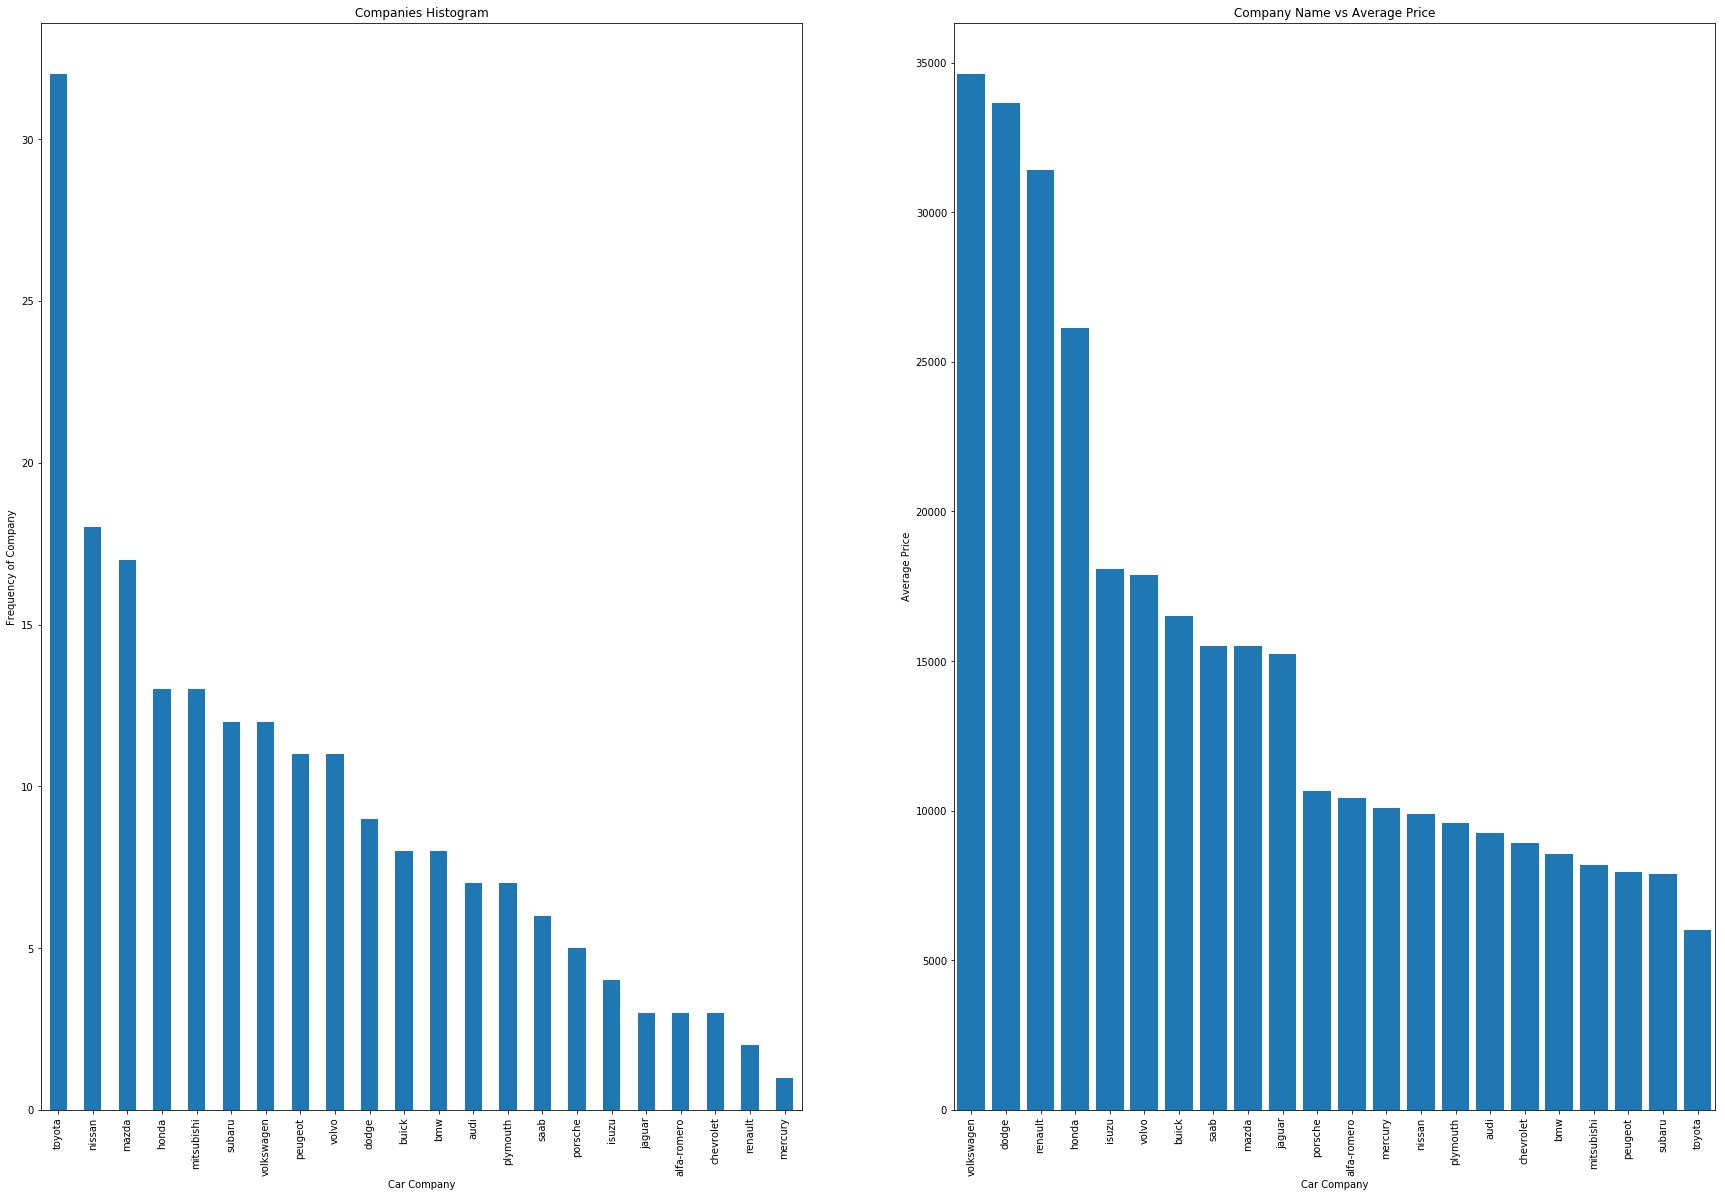

In [12]:
#car company
plt.figure(figsize=(30,20))

#plot 1.1
plt.subplot(1,2,1)
plt1 = car_price['company'].value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Company')



#plot 1.2
plt.subplot(1,2,2)
company_vs_price = pd.DataFrame(car_price.groupby(['company'])['price'].mean().sort_values(ascending = False))
plt2=company_vs_price.index.value_counts().plot('bar')
plt.title('Company Name vs Average Price')
plt2.set(xlabel='Car Company', ylabel='Average Price')
xs=company_vs_price.index
ys=company_vs_price['price'].round(2)
plt.bar(xs,ys)



<BarContainer object of 2 artists>

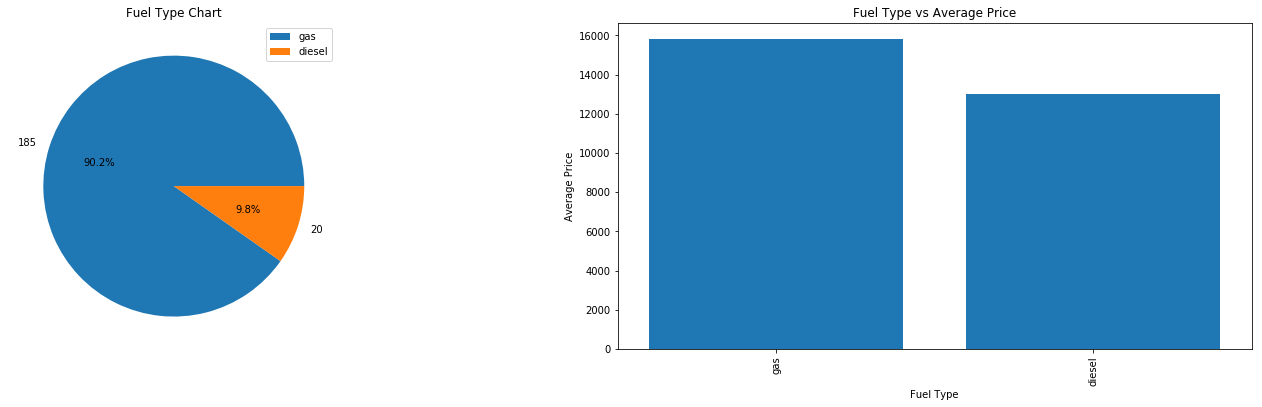

In [13]:
#Fuel Type

plt.figure(figsize=(25, 6))

#plot 2.1
plt.subplot(1,2,1)
plt.title('Fuel Type Chart')
labels=car_price['fueltype'].unique()
plt3 = car_price['fueltype'].value_counts().tolist()
plt.pie(plt3,labels=plt3, autopct='%1.1f%%')
plt.legend(labels)

#plot 2.2
plt.subplot(1,2,2)
fuel_vs_price = pd.DataFrame(car_price.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
plt4=fuel_vs_price.index.value_counts().plot('bar')
plt.title('Fuel Type vs Average Price')
plt4.set(xlabel='Fuel Type', ylabel='Average Price')
xs=fuel_vs_price.index
ys=fuel_vs_price['price'].round(2)
plt.bar(xs,ys)


<BarContainer object of 5 artists>

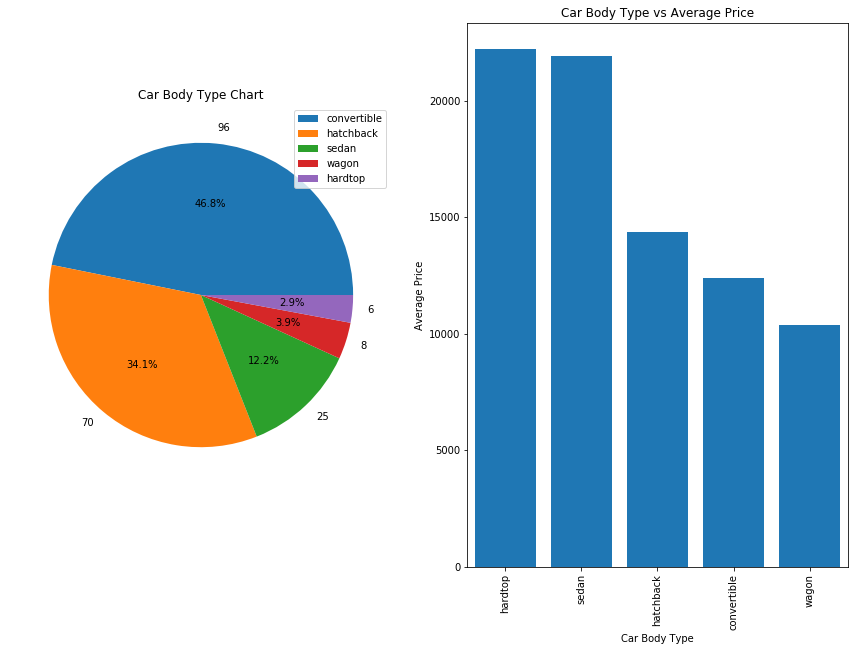

In [14]:
# #Car Body Type

plt.figure(figsize=(15,10))

#plot 3.1
plt.subplot(1,2,1)
plt.title('Car Body Type Chart')
labels=car_price['carbody'].unique()
plt5 = car_price['carbody'].value_counts().tolist()
plt.pie(plt5, labels=plt5, autopct='%1.1f%%')
plt.legend(labels, loc=1)

#plot 3.2
plt.subplot(1,2,2)
car_vs_price = pd.DataFrame(car_price.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
plt6=car_vs_price.index.value_counts().plot('bar')
plt.title('Car Body Type vs Average Price')
plt6.set(xlabel='Car Body Type', ylabel='Average Price')
xs=car_vs_price.index
ys=car_vs_price['price'].round(2)
plt.bar(xs,ys)


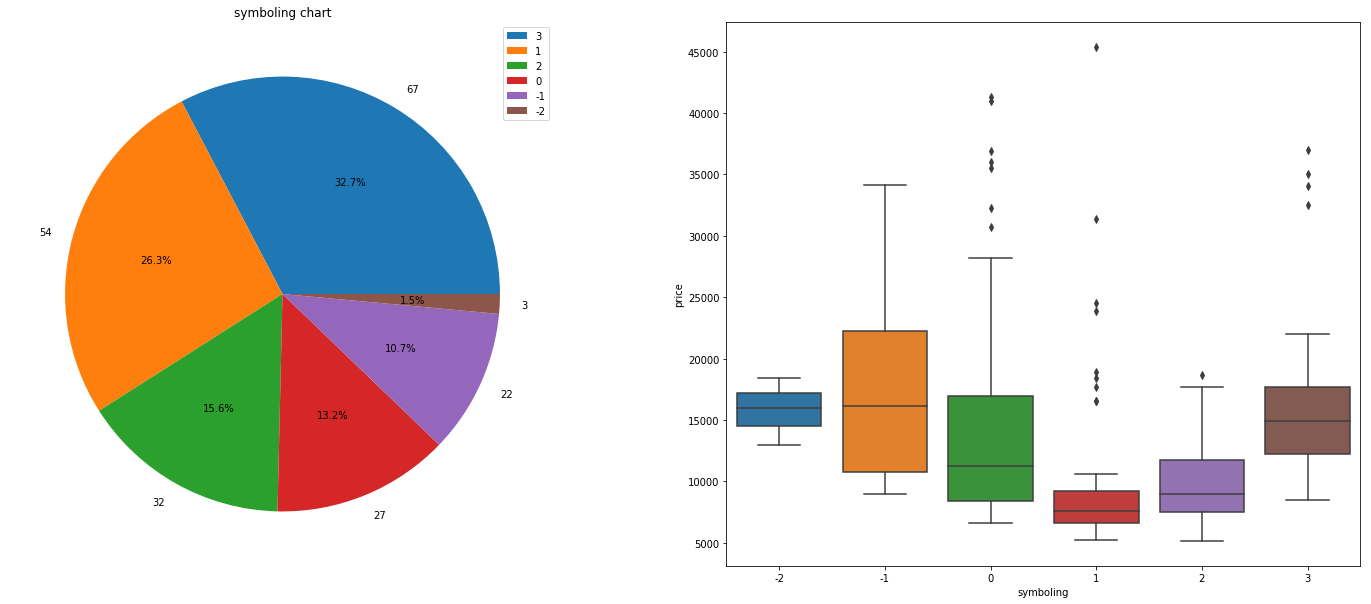

In [15]:
#symboling
plt.figure(figsize=(25,10))
#plt4.1
plt.subplot(1,2,1)
plt.title('symboling chart')
labels=car_price['symboling'].unique()
plt7=car_price['symboling'].value_counts().tolist()
plt.pie(plt7,labels=plt7,autopct='%1.1f%%')
plt.legend(labels)
#plt4.2
plt.subplot(1,2,2)
sns.boxplot(x=car_price['symboling'],y=car_price['price'])
plt.show()

Text(0.5, 1.0, 'engine type vs price')

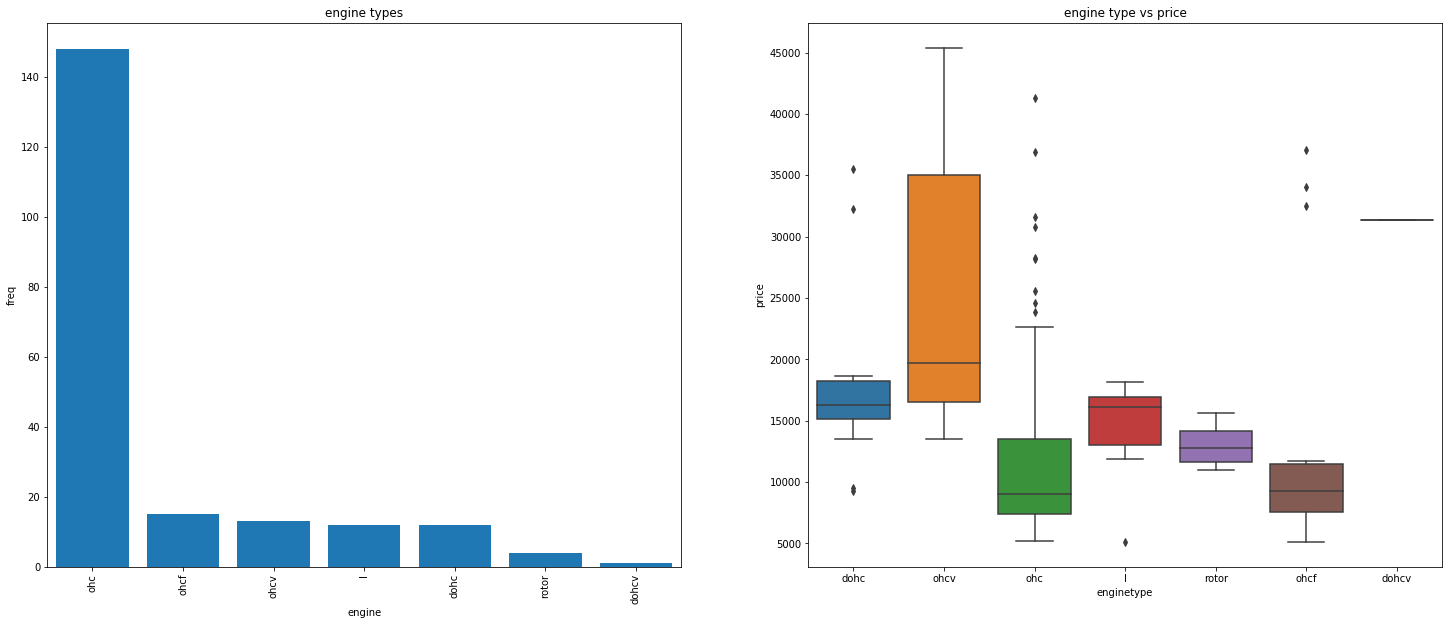

In [16]:
#engine type
plt.figure(figsize=(25,10))
#plot5.1
plt.subplot(1,2,1)
plt8=car_price['enginetype'].value_counts().plot('bar')
plt.title('engine types')
plt8.set(xlabel='engine',ylabel='freq')
xs=car_price['enginetype'].unique()
ys=car_price['enginetype'].value_counts()
plt.bar(xs,ys)

#plot5.2
plt.subplot(1,2,2)
sns.boxplot(x=car_price['enginetype'],y=car_price['price'])
plt.title('engine type vs price')


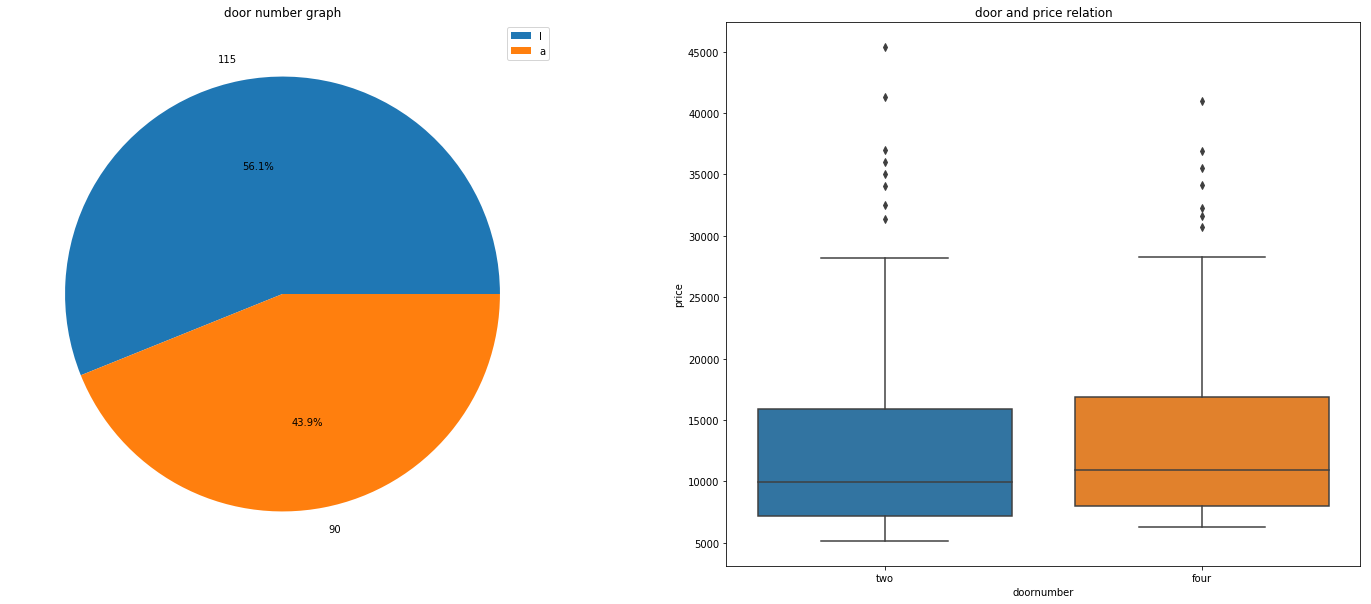

In [17]:
#door number
plt.figure(figsize=(25,10))
#plt6.1
plt.subplot(1,2,1)
plt8=car_price['doornumber'].value_counts().tolist()
labels=car_price['doornumber'].unique()
plt.title('door number graph')
plt.pie(plt8,labels=plt8,autopct='%1.1f%%')
plt.legend('labels',loc=1)
#plt6.2
plt.subplot(1,2,2)
sns.boxplot(x=car_price['doornumber'],y=car_price['price'])
plt.title('door and price relation')
plt.show()

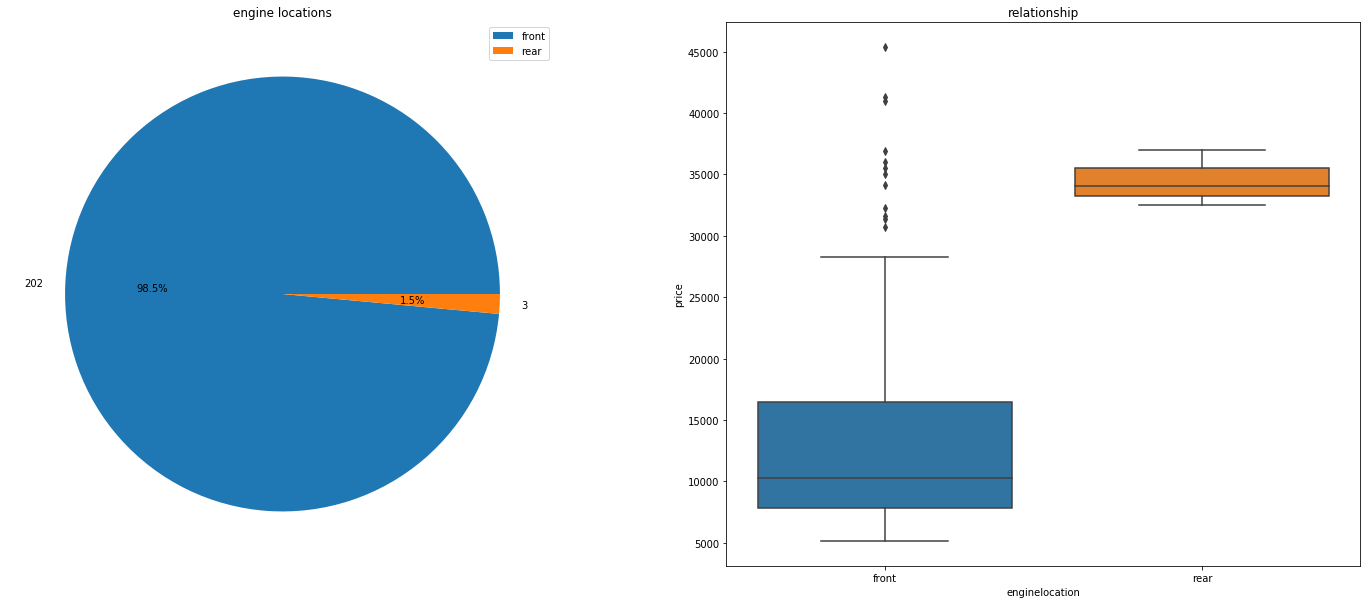

In [18]:
#engine location
plt.figure(figsize=(25,10))
#plt7.1
plt.subplot(121)
plt9=car_price['enginelocation'].value_counts().tolist()
labels=car_price['enginelocation'].unique()
plt.pie(plt9,labels=plt9,autopct='%1.1f%%')
plt.title('engine locations')
plt.legend(labels,loc=1)
#plt7.2
plt.subplot(122)
sns.boxplot(x=car_price['enginelocation'],y=car_price['price'])
plt.title('relationship')
plt.show()

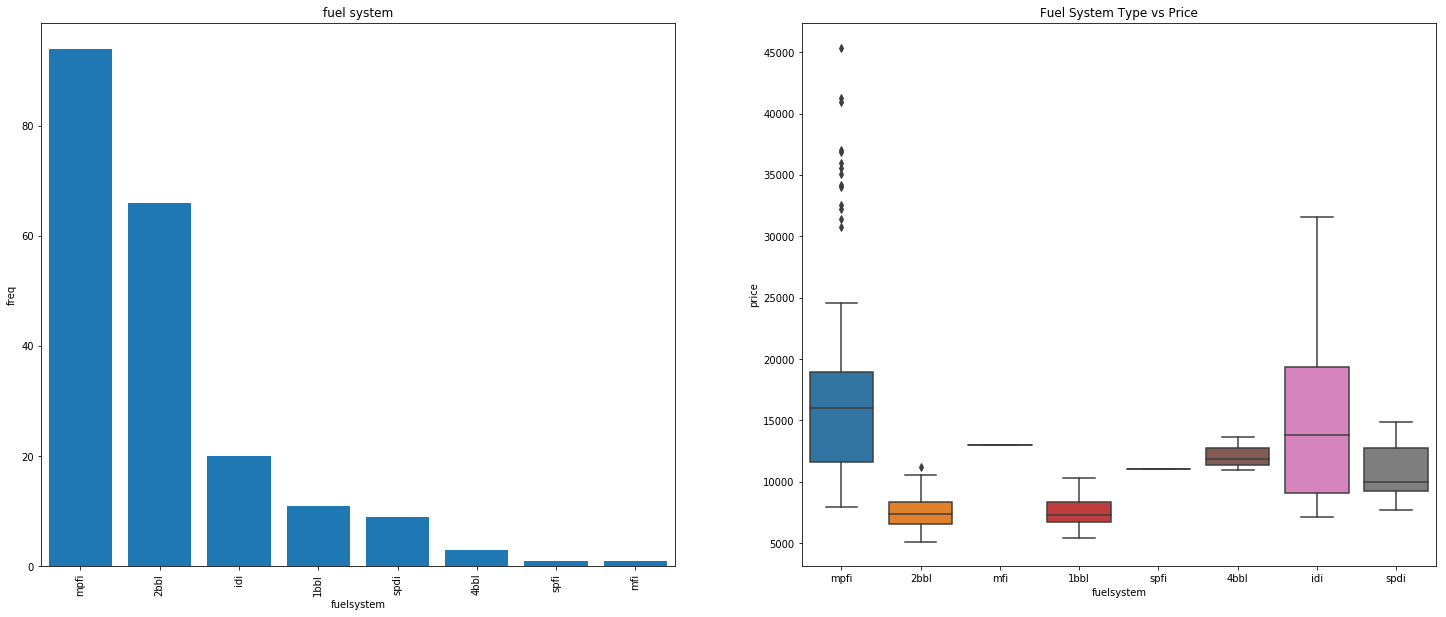

In [19]:
#fuel system
plt.figure(figsize=(25,10))
#plt8.1
plt.subplot(1,2,1)
plt10=car_price['fuelsystem'].value_counts().plot('bar')
plt10.set(xlabel='fuelsystem',ylabel='freq')
plt.title('fuel system')
ys=car_price['fuelsystem'].value_counts()
xs=car_price['fuelsystem'].unique()
plt.bar(xs,ys)

#plt8.2
plt.subplot(1,2,2)
plt.title('Fuel System Type vs Price')
sns.boxplot(x=car_price['fuelsystem'], y=car_price['price'])
plt.show()


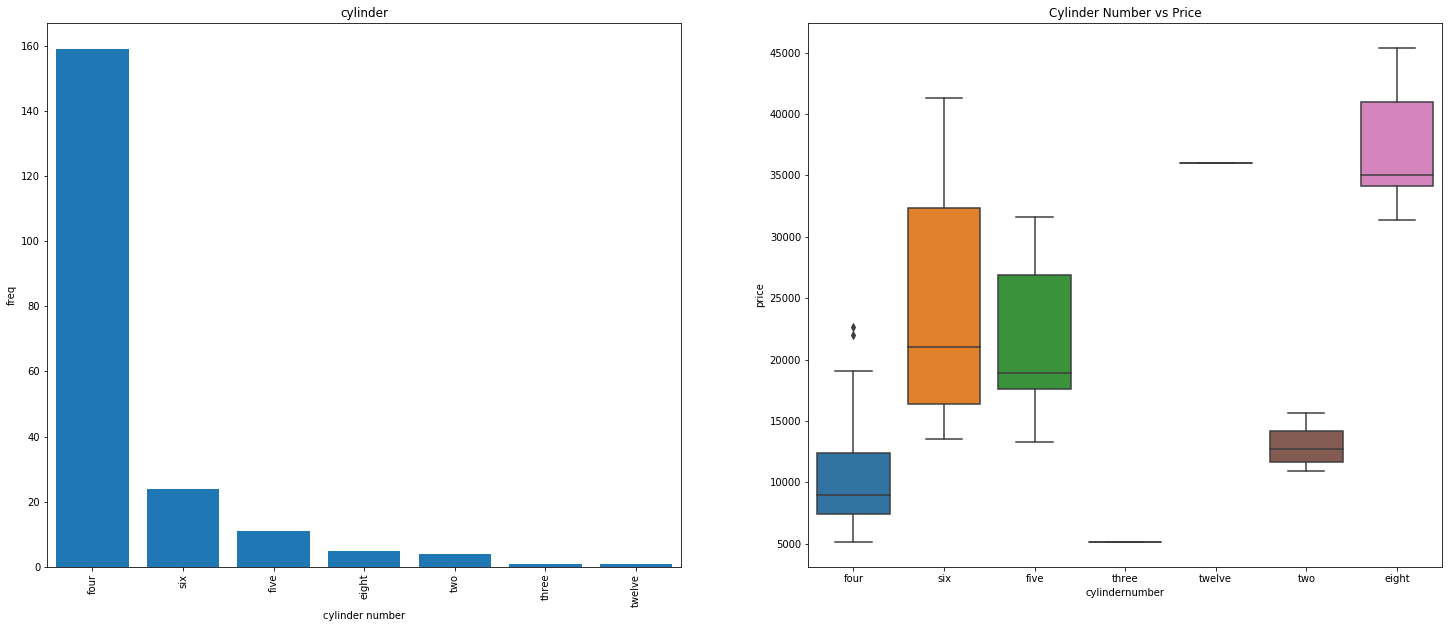

In [20]:
#cylinder number
plt.figure(figsize=(25,10))
#plt 9.1
plt.subplot(121)
plt11=car_price['cylindernumber'].value_counts().plot('bar')
plt.title('cylinder')
plt11.set(xlabel='cylinder number',ylabel='freq')
xs=car_price['cylindernumber'].unique()
ys=car_price['cylindernumber'].value_counts()
plt.bar(xs,ys)
 
#plt9.2
plt.subplot(1,2,2)
plt.title('Cylinder Number vs Price')
sns.boxplot(x=car_price['cylindernumber'], y=car_price['price'])
plt.show()


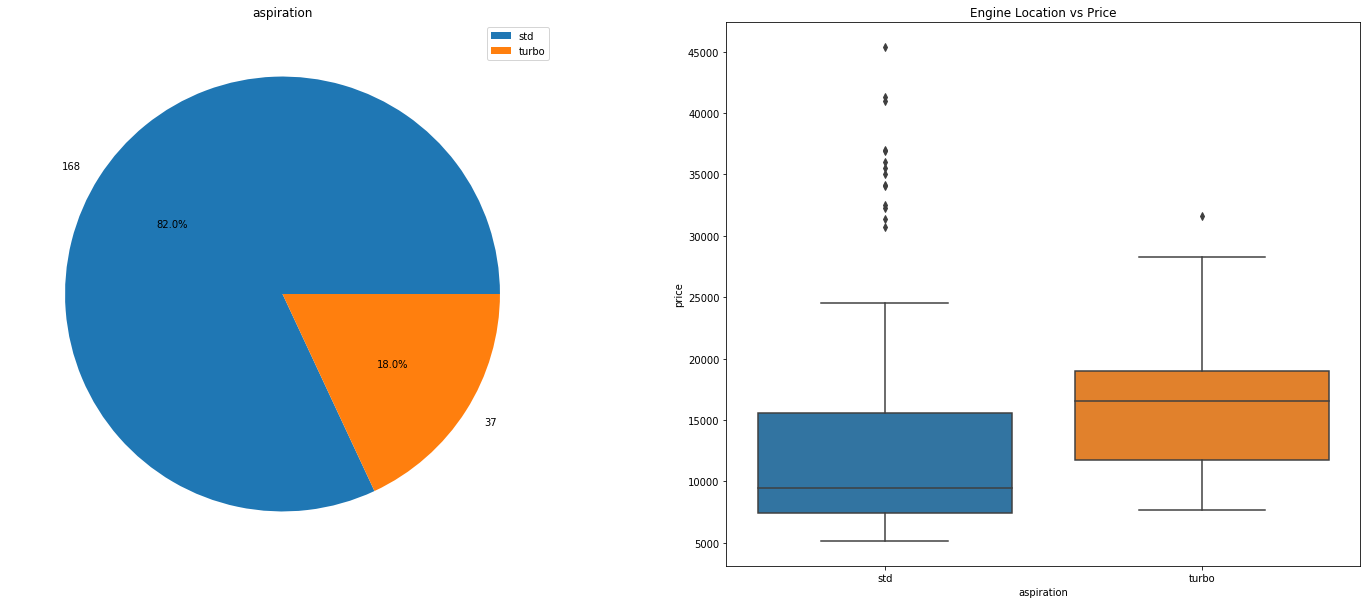

In [21]:
#aspiration
plt.figure(figsize=(25,10))
#plt10.1
plt.subplot(121)
plt12=car_price['aspiration'].value_counts().tolist()
labels=car_price['aspiration'].unique()
plt.title('aspiration')
plt.pie(plt12,labels=plt12,autopct='%1.1f%%')
plt.legend(labels)
#plt10.2
plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=car_price['aspiration'], y=car_price['price'])
plt.show()

C:\Users\dell\Anaconda3b\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


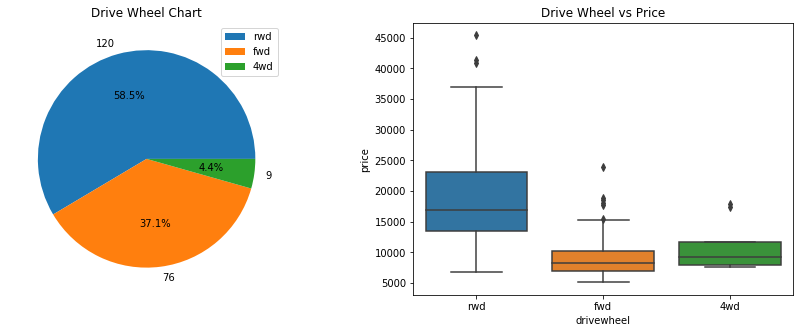

In [22]:
#drivewheels
plt.figure(figsize=(15,5))
#plt11.1
plt.subplot(121)
plt.subplot(1,2,1)
labels=car_price['drivewheel'].unique()
plt13 = car_price['drivewheel'].value_counts().tolist()
plt.title('Drive Wheel Chart')
plt.pie(plt13, labels=plt13, autopct='%1.1f%%')
plt.legend(labels)

#plot 2
plt.subplot(1,2,2)
plt.title('Drive Wheel vs Price')
sns.boxplot(x=car_price['drivewheel'], y=car_price['price'])
plt.show()


In [23]:
"""

Numerical Variables 

-Car Length                             #
-Car Width                              #
-Car Height                             #
-Curb Weight                            #
-Horsepower                             #
-Bore Ratio                             #
-Compression Ratio                      #
-Highway miles per gallon (mpg)         #        
-Engine Size                            #                  
-Stroke                                 #
-City Miles per gallon (mpg)            #
-Peak Revolutions per Minute (rpm)      #
-Wheel Base                             #
 

"""

'\n\nNumerical Variables \n\n-Car Length                             #\n-Car Width                              #\n-Car Height                             #\n-Curb Weight                            #\n-Horsepower                             #\n-Bore Ratio                             #\n-Compression Ratio                      #\n-Highway miles per gallon (mpg)         #        \n-Engine Size                            #                  \n-Stroke                                 #\n-City Miles per gallon (mpg)            #\n-Peak Revolutions per Minute (rpm)      #\n-Wheel Base                             #\n \n\n'

In [24]:
def scatterplot(df,var):
    
    plt.scatter(df[var],df['price'])
    plt.xlabel(var);plt.ylabel('price')
    plt.title('scatter plot for'+var+ 'vs price')

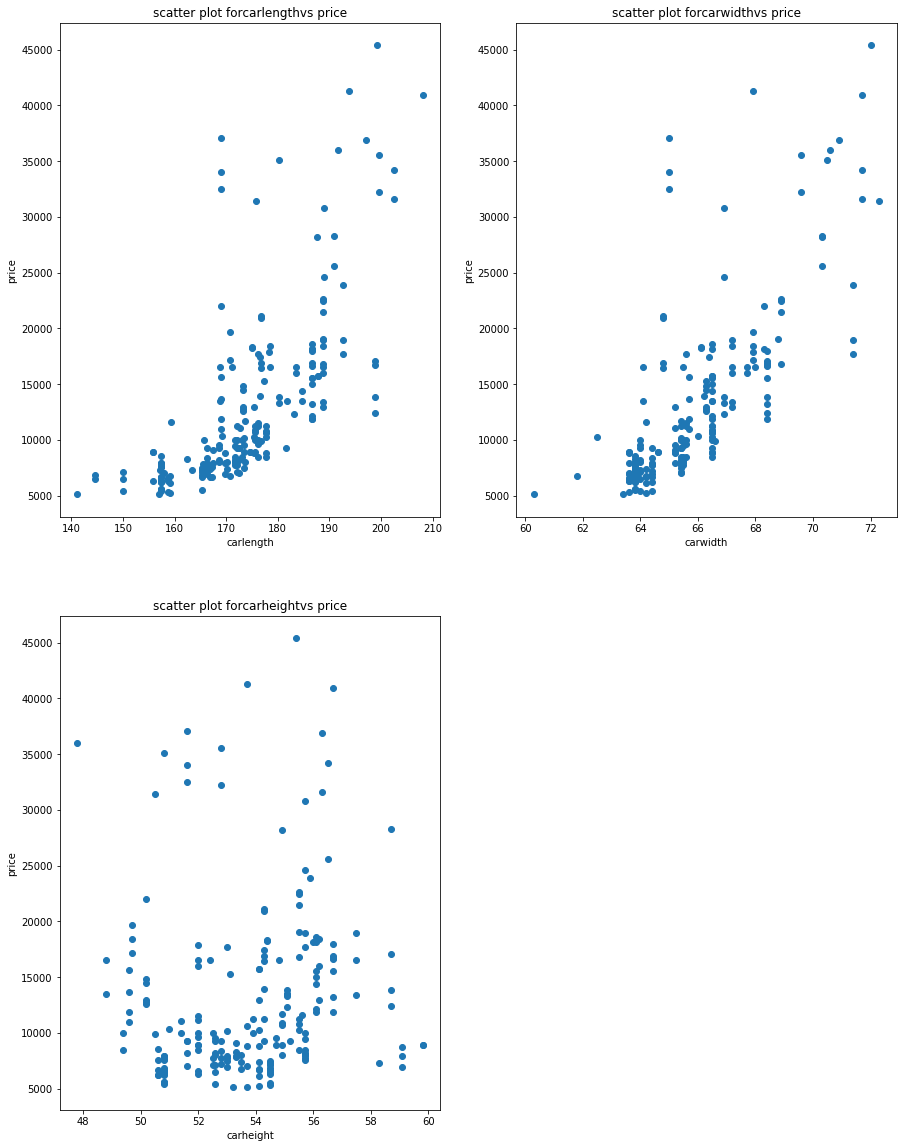

<Figure size 432x288 with 0 Axes>

In [25]:
#1.car length width and height
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
scatterplot(car_price,'carlength')    
plt.subplot(2,2,2)
scatterplot(car_price,'carwidth')
plt.subplot(2,2,3)
scatterplot(car_price,'carheight')
plt.show()
plt.tight_layout()



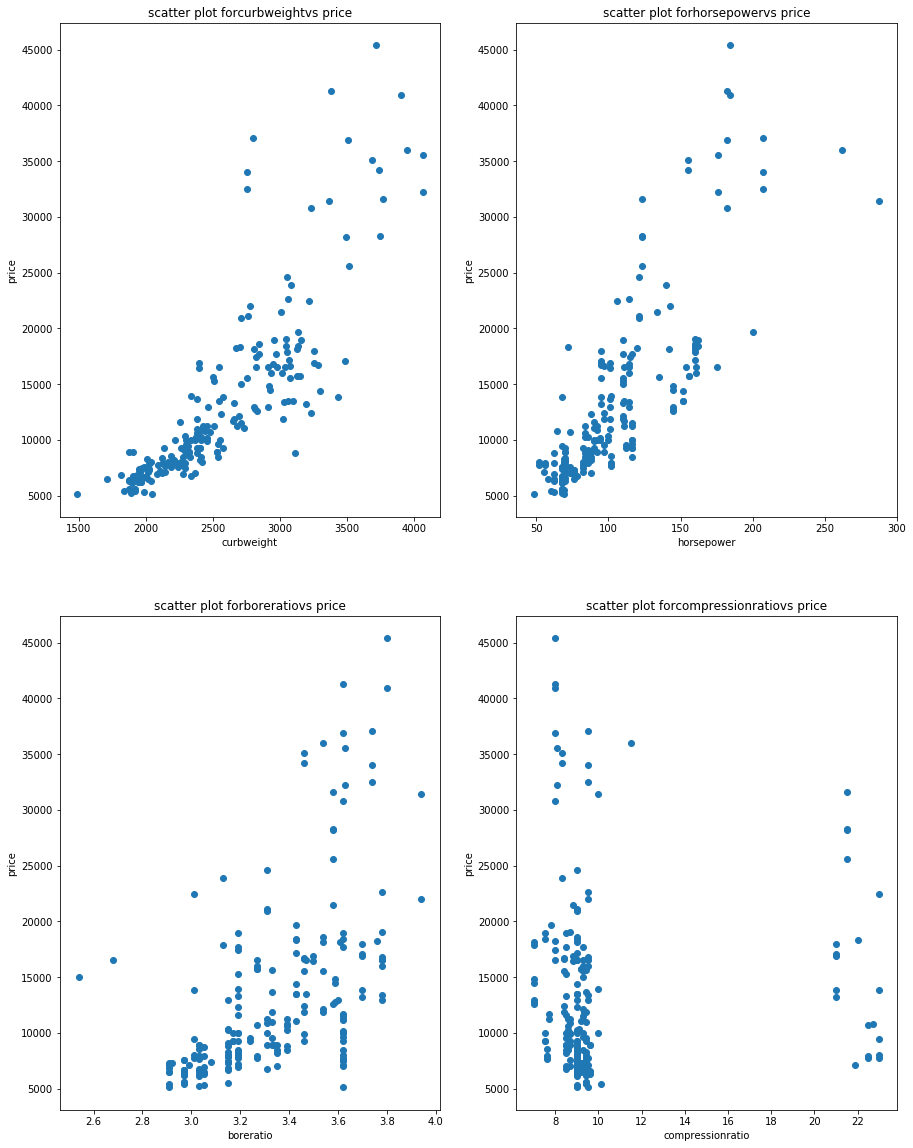

<Figure size 432x288 with 0 Axes>

In [26]:
#3. Curb Weight (Effective Weight of Car including its internal components), HorsePower, Boreratio, and Compression Ratio
    
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
scatterplot(car_price,'curbweight')    
plt.subplot(2,2,2)
scatterplot(car_price,'horsepower')
plt.subplot(2,2,3)
scatterplot(car_price,'boreratio')
plt.subplot(2,2,4)
scatterplot(car_price,'compressionratio')
plt.show()
plt.tight_layout() 

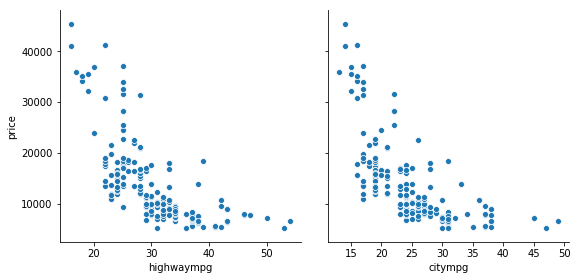

In [27]:
#4 highway mpg and city mpg
sns.pairplot(car_price,x_vars=['highwaympg','citympg'],y_vars='price',height=4,aspect=1,kind='scatter')

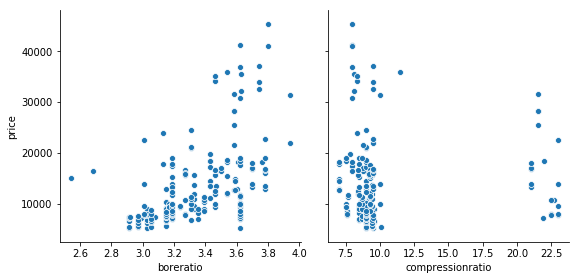

In [28]:
#5 bore ratio and compression ratio
sns.pairplot(car_price,x_vars=['boreratio','compressionratio'],y_vars='price',height=4,aspect=1,kind='scatter')

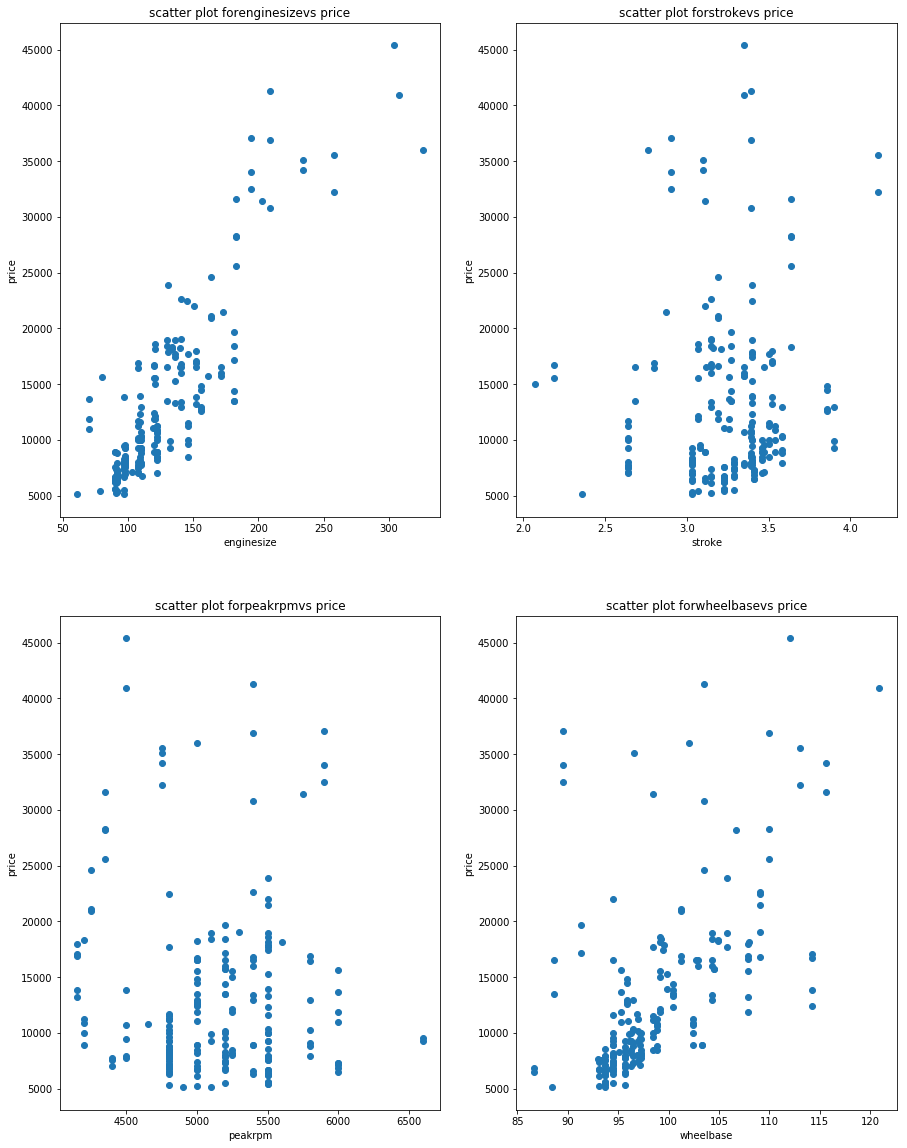

<Figure size 432x288 with 0 Axes>

In [29]:
#6. Engine Size, Stroke, RPM and Wheelbase
        
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
scatterplot(car_price,'enginesize')    
plt.subplot(2,2,2)
scatterplot(car_price,'stroke')
plt.subplot(2,2,3)
scatterplot(car_price,'peakrpm')
plt.subplot(2,2,4)
scatterplot(car_price,'wheelbase')
plt.show()
plt.tight_layout()    


In [30]:
#correlation with price(target variable) for numeric data
cor=car_price.corr().round(3).loc['price']
cor=pd.DataFrame(cor)
result=[]
for i in cor['price']:
    if(i>-1 and i<-0.4):result.append('strongly negative')
    elif(i>-0.4 and i<-0.2):result.append('moderately negative')
    elif(i>-0.2 and i<0):result.append('week negative')
    elif(i>0 and i<0.2):result.append('week positive')
    elif(i>0.2 and i<0.5):result.append('moderate positive')
    else:result.append('strongly positive')  
cor['correlation']=result     
cor['correlation'].value_counts()

strongly positive    8
week positive        3
week negative        3
strongly negative    2
Name: correlation, dtype: int64

In [31]:
#variables to be taken
varr=cor[(cor.correlation == 'strongly positive') | (cor.correlation == 'strongly negative')]
varr

,price,correlation
wheelbase,0.578,strongly positive
carlength,0.683,strongly positive
carwidth,0.759,strongly positive
curbweight,0.835,strongly positive
enginesize,0.874,strongly positive
boreratio,0.553,strongly positive
horsepower,0.808,strongly positive
citympg,-0.686,strongly negative
highwaympg,-0.698,strongly negative
price,1.000,strongly positive


In [32]:
# regression

In [33]:
cars=car_price[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','enginetype','fueltype','carbody','aspiration','cylindernumber','drivewheel']]
cars.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'enginetype',
       'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel'],
      dtype='object')

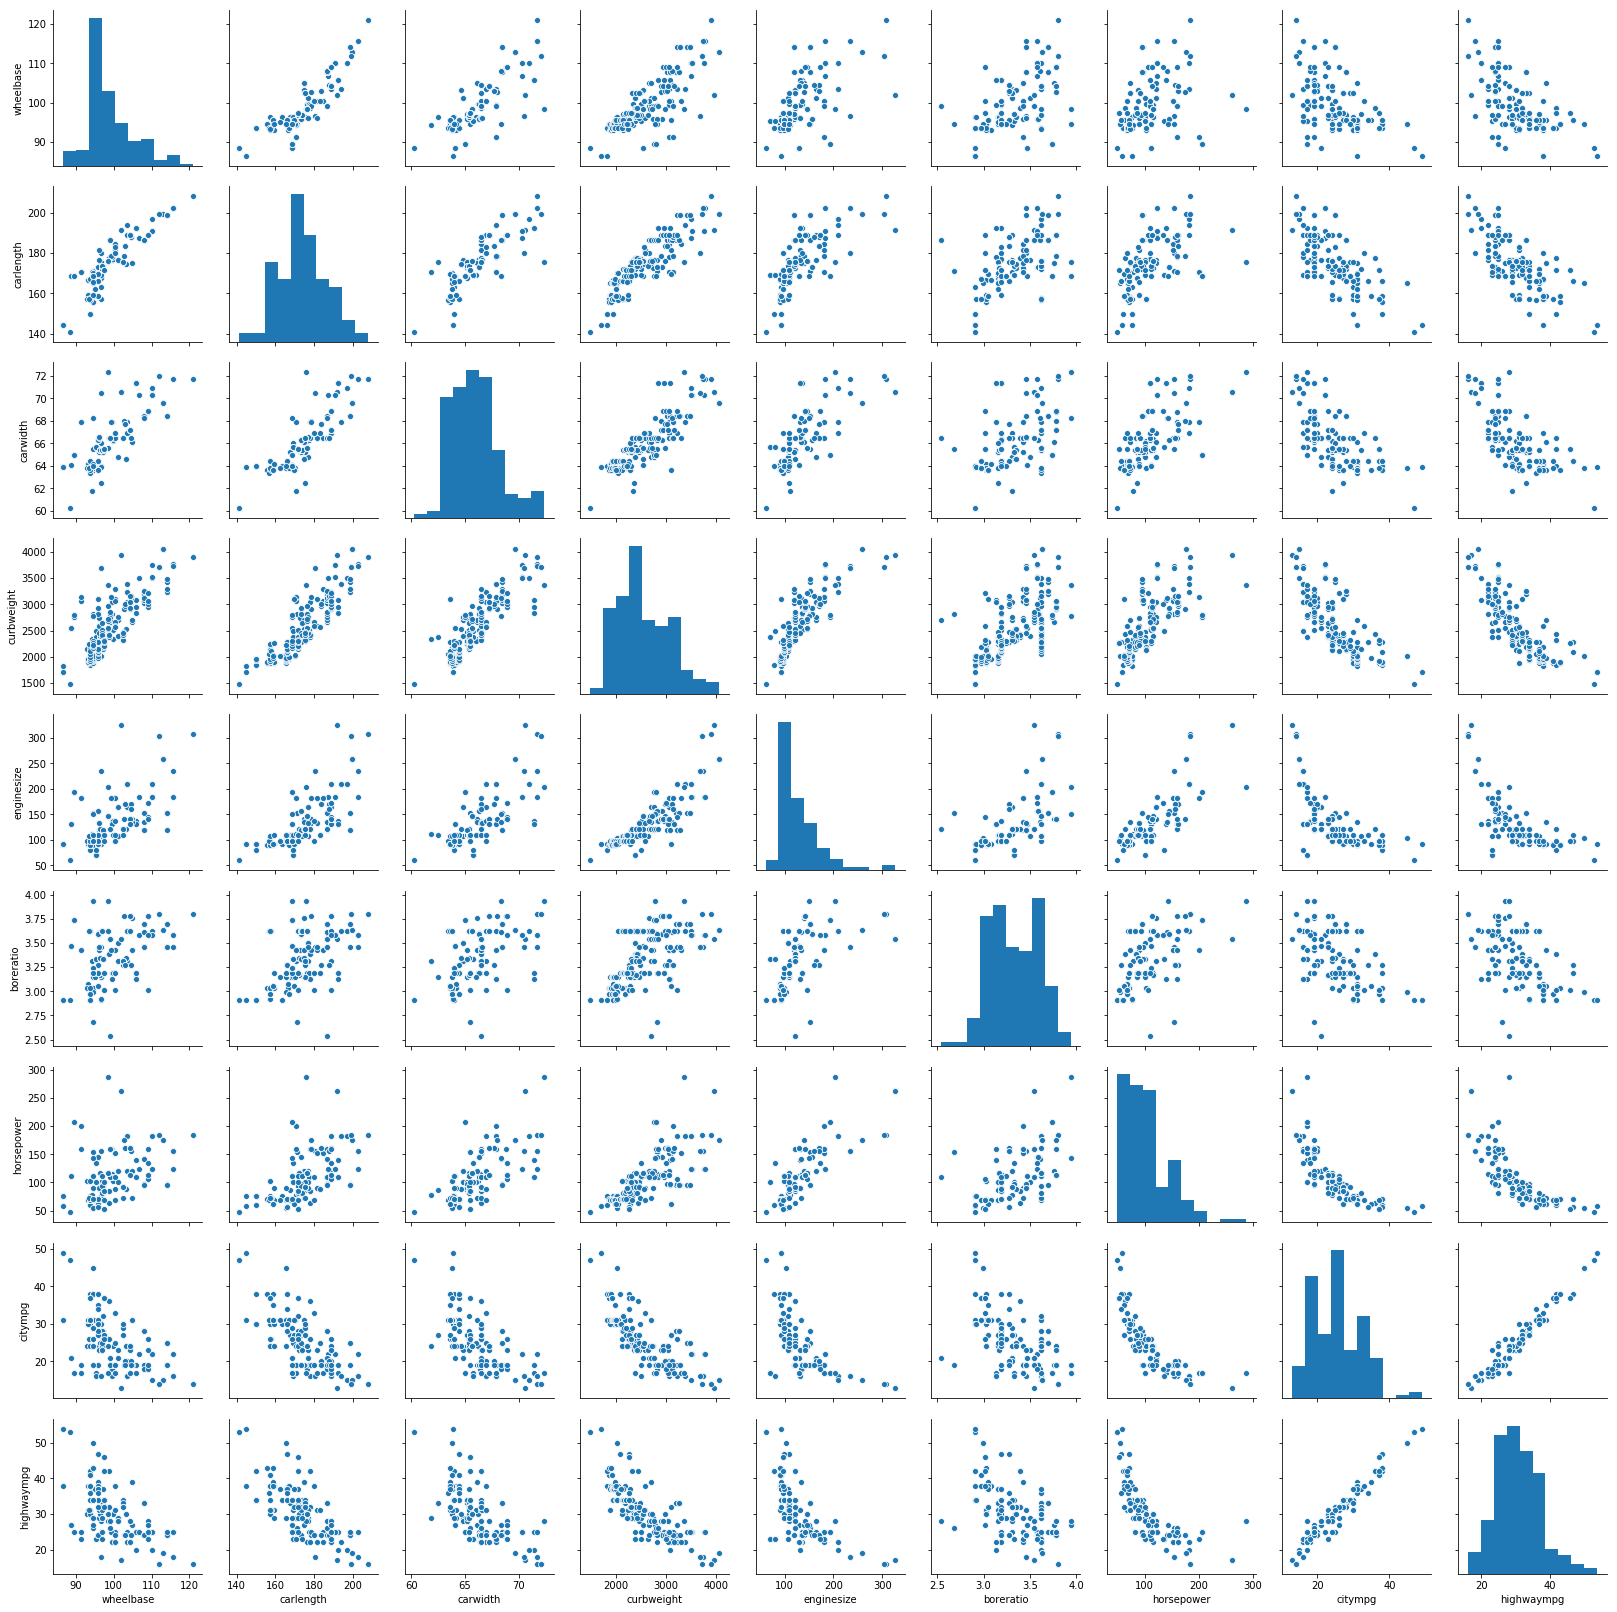

In [34]:
sns.pairplot(cars)
plt.show()

In [35]:
nums={"fueltype":{"gas":1,"diesel":2},"aspiration":{"std":1,"turbo":2},"doornumber":{"four":4,"two":2},"carbody":{"sedan":1,"hatchback":2,"wagon":3,"hardtop":4,"convertible":5},"drivewheel":{"fwd":1,"rwd":2,"4wd":3},"enginelocation":{"front":1,"rear":2},"enginetype":{"ohc":1,"ohcf":2,"ohcv":3,"dohc":4,"l":5,"rotor":5,"dohcv":6},"cylindernumber":{"four":4,"six":6,"five":5,"eight":8,"two":2,"three":3,"twelve":12},"fuelsystem":{"mpfi":1,"2bbl":2,"idi":3,"1bbl":4,"spdi":5,"4bbl":6,"spfi":7,"mfi":8}}

In [36]:
car_price.replace(nums, inplace=True)

In [37]:
car_price.drop(["CarName"],axis=1,inplace=True)

In [39]:
car_price.head(2)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,carmodel
0,1,3,1,1,2,5,2,1,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,1,1,2,5,2,1,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio


# 4.model building

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
x=car_price[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'enginetype',
       'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']]
y=car_price['price']


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()


In [44]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred=pd.DataFrame(regressor.predict(x_test),columns=['y_test'])

In [50]:
pd.DataFrame(y_test)

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0
170,11199.0
76,5389.0
154,7898.0
104,17199.0
33,6529.0


In [53]:
predicted_price=pd.DataFrame(regressor.predict(x))
car_price['predicted_price']=predicted_price
car_price.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,carmodel,predicted_left,predicted_price
0,1,3,1,1,2,5,2,1,88.6,168.8,...,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,12691.241770,12691.241770
1,2,3,1,1,2,5,2,1,88.6,168.8,...,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,12691.241770,12691.241770
2,3,1,1,1,2,2,2,1,94.5,171.2,...,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,21007.099419,21007.099419
3,4,2,1,1,4,1,1,1,99.8,176.6,...,10.0,102,5500,24,30,13950.0,audi,100 ls,12035.297386,12035.297386
4,5,2,1,1,4,1,3,1,99.4,176.6,...,8.0,115,5500,18,22,17450.0,audi,100ls,18760.129258,18760.129258


In [56]:
comp=pd.DataFrame(car_price[['price','predicted_price']])

In [48]:
regressor.score(x_test,y_test).round(2)

0.78

<Figure size 1800x1080 with 0 Axes>

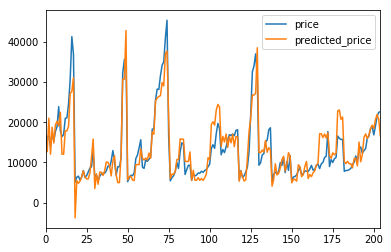

In [62]:
plt.figure(figsize=(25,15))
comp.plot()